<a href="https://colab.research.google.com/github/kvmkrao/cdml/blob/master/ml_net_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#https://en.wikipedia.org/wiki/Thermal_expansion
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 

In [4]:
COLUMNS =  ['Linear','Volume','Class']
FEATURES = ['Linear','Volume']
LABEL = "Class"
def get_input_fn(data_set, num_epochs=None, shuffle=True):
  return tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=pd.DataFrame({k: data_set[k].values for k in FEATURES}),
      y=pd.Series(data_set[LABEL].values),
      num_epochs=num_epochs,
      shuffle=shuffle)

In [5]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
    The code below is intended to be simple and educational, NOT optimal.
    Real neural net code looks nothing like this.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1) #neuron1 in hidden layer1
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2) #neuron2 in hidden layer1
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)     ##neuron1 in output layer
    return o1

  def train(self, data, y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 5000 # number of times to loop through the entire dataset
    
    los = np.zeros(epochs)
    epo = np.zeros(epochs)
    for epoch in range(epochs):
      for x, y_true in zip(data, y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        dL_dy = -2 * (y_true - y_pred)

        # Neuron o1
        dy_dw5 = h1 * deriv_sigmoid(sum_o1)
        dy_dw6 = h2 * deriv_sigmoid(sum_o1)
        dy_db3 = deriv_sigmoid(sum_o1)

        dy_dh1 = self.w5 * deriv_sigmoid(sum_o1)
        dy_dh2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        dh1_dw1 = x[0] * deriv_sigmoid(sum_h1)
        dh1_dw2 = x[1] * deriv_sigmoid(sum_h1)
        dh1_db1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        dh2_dw3 = x[0] * deriv_sigmoid(sum_h2)
        dh2_dw4 = x[1] * deriv_sigmoid(sum_h2)
        dh2_db2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * dL_dy * dy_dh1 * dh1_dw1
        self.w2 -= learn_rate * dL_dy * dy_dh1 * dh1_dw2
        self.b1 -= learn_rate * dL_dy * dy_dh1 * dh1_db1

        # Neuron h2
        self.w3 -= learn_rate * dL_dy * dy_dh2 * dh2_dw3
        self.w4 -= learn_rate * dL_dy * dy_dh2 * dh2_dw4
        self.b2 -= learn_rate * dL_dy * dy_dh2 * dh2_db2

        # Neuron o1
        self.w5 -= learn_rate * dL_dy * dy_dw5
        self.w6 -= learn_rate * dL_dy * dy_dw6
        self.b3 -= learn_rate * dL_dy * dy_db3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(y_trues, y_preds)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
      los[epoch] = loss 
      epo[epoch] = epoch
    return los,epo



Gold: 0.992
Polymer: 0.003


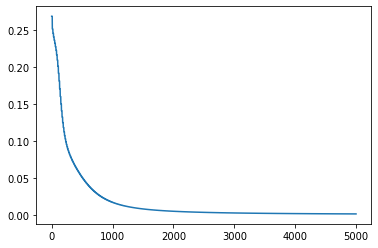

In [13]:
# Define dataset
data = np.array([
  [23.1, 69],   # Aluminium	Metal	23.1	69
  [17, 51],     # Copper	Metal	17	51
  [250, 750],   # Ethanol	Liquid	250	750
  [317, 950],   # Gasoline	Liquid	317	950[20]
  [11.8, 35.4], # Iron	Metal	11.8	35.4
  [29, 87],     # Lead	Metal	29	87\
  [13.0, 39],   # Nickel	Metal	13	39
  [69.0, 207],  #Water	Nonmetal	69	207
])

c0max = data[:,0].max()
c1max = data[:,1].max()
data[:,0] = data[:,0]/c0max
data[:,1] = data[:,1]/c1max

y_train = np.array([
  1, # Al
  1, # Cu
  0, # Ethanol
  0, # Gasoline
  1, # Iron
  1, #Lead
  1, #Nickel 
  0, #water
])

#https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9
# Train our neural network!
network = OurNeuralNetwork()
los, epo = network.train(data, y_train)
plt.plot(epo, los)
# Make some predictions
gold = np.array([14/c0max, 42/c1max]) # Gold	Metal	14	42
polymer = np.array([150/c0max, 450/c1max])  # Polypropylene (PP)	Polymer	150	450
print("Gold: %.3f" % network.feedforward(gold)) # metal
print("Polymer: %.3f" % network.feedforward(polymer)) # non-metal

In [7]:
# https://scikit-learn.org/stable/modules/linear_model.html
# least squres method
from sklearn.linear_model import LinearRegression
data = np.array([
  [23.1, 69],   # Aluminium	Metal	23.1	69
  [17, 51],     # Copper	Metal	17	51
  [250, 750],   # Ethanol	Liquid	250	750
  [317, 950],   # Gasoline	Liquid	317	950[20]
  [11.8, 35.4], # Iron	Metal	11.8	35.4
  [29, 87],     # Lead	Metal	29	87\
  [13.0, 39],   # Nickel	Metal	13	39
  [69.0, 207],  #Water	Nonmetal	69	207
])

y_train = np.array([
  1, # Al
  1, # Cu
  0, # Ethanol
  0, # Gasoline
  1, # Iron
  1, #Lead
  1, #Nickel 
  0, #water
])

c0max = data[:,0].max()
c1max = data[:,1].max()
data[:,0] = data[:,0]/c0max
data[:,1] = data[:,1]/c1max


LR = LinearRegression()
# fitting the training data
LR.fit(data,y_train)

y_pred = LR.predict([[14/c0max, 42/c1max],[150/c0max, 450/c1max] ])
print(y_pred)

[0.89245946 0.29439583]


In [18]:
# random forest regression 
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 8 decision trees
rf = RandomForestRegressor(n_estimators =9,random_state = 1)
# Train the model on training data
model = rf.fit(data,y_train)
# test data 
test_data = [[14/c0max, 42/c1max],[150/c0max, 450/c1max]]
# predict 
y_pred = model.predict(test_data)  # test the output by changing values
print(y_pred) 

[1. 0.]


In [22]:
input_size=2
output_size=1
models = tf.keras.Sequential([ tf.keras.layers.Dense(output_size,activation="sigmoid")])
custom_optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)  #SGD
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(data,y_train,epochs=10000,verbose=0)

#weights=models.layers[0].get_weights()[0]
#bias=models.layers[0].get_weights()[1]
test_data=[[14/c0max, 42/c1max],[150/c0max, 450/c1max]]
out=models.predict(test_data)
print(out)


[[9.965627e-01]
 [9.279872e-08]]


In [10]:
# tensorflow 
dftrx = pd.DataFrame(data, columns=['Linear','Volume'])
dftry = pd.DataFrame(y_train, columns=['Class'])
train_set = pd.concat([dftrx, dftry], ignore_index=True, axis=1)
train_set.columns = ['Linear','Volume','Class']
print(train_set)

test_data=[[14/c0max, 42/c1max, 1],[150/c0max, 450/c1max, 0] ] 
test_set = pd.DataFrame(test_data)   #, columns=['Linear','Volume','Class'])
test_set.columns = ['Linear','Volume','Class']
print(test_set)


     Linear    Volume  Class
0  0.072871  0.072632      1
1  0.053628  0.053684      1
2  0.788644  0.789474      0
3  1.000000  1.000000      0
4  0.037224  0.037263      1
5  0.091483  0.091579      1
6  0.041009  0.041053      1
7  0.217666  0.217895      0
     Linear    Volume  Class
0  0.044164  0.044211      1
1  0.473186  0.473684      0


In [11]:
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel('WARNING') #INFO, DEBUG, ERROR 
feature_cols = [tf.feature_column.numeric_column(k) for k in FEATURES]
opti = tf.keras.optimizers.Adam(learning_rate = 0.02) #,epsilon=0.01)
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,hidden_units=[2, 1],activation_fn=tf.nn.sigmoid, optimizer=opti)
                                      #,dropout = 0.004,optimizer=opti)  #,model_dir='/model') #opti.apply_gradients(zip([grad], [x]))

regressor.train(input_fn=get_input_fn(train_set),steps=10000)

prediction = regressor.predict(input_fn=get_input_fn(test_set, num_epochs=1, shuffle=False))
y_predicted = np.array(list(p['predictions'] for p in prediction))
print(abs(y_predicted))

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
[[1.0022248 ]
 [0.00160238]]


In [55]:
#Support Vector Regression
#https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
from sklearn.svm import SVR
#regressor = SVR(kernel = 'rbf') 
regressor = SVR(kernel='linear',C=100, gamma=0.1, degree=4)
#regressor = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#regressor = SVR(kernel="linear", C=100, gamma="auto")
#regressor = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=0.85)


regressor.fit(data,y_train)
y_pred = regressor.predict(test_data)
#y_pred = sc_y.inverse_transform(y_pred) 
print(y_pred)

[0.93079077 0.46784868]


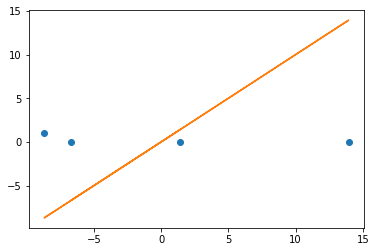

In [61]:
#ploynomial fit in numpy 
z = np.polyfit(data[:,0], y_train, 3)
z1 = np.polyfit(data[:,1], y_train, 3)
zf = np.polyfit(z, z1, 3)
plt.plot(z,zf,'o', z,z1)

339473


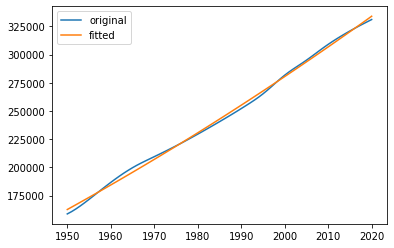

In [143]:
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import numpy as np 

url = 'https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx'
#s = requests.get(url).content
#dfp = pd.read_csv(s)
dfp = pd.read_excel(url)
dfp.fillna(0)
#dfp.info()
#dfp.describe
dfp.drop(dfp.columns[[0,1,2,3,4,5,6]], axis = 1, inplace = True)
data = dfp.values

yrdt = data[304,:]
#1950-2020 *(US population)
x = np.arange(1950, 2021,1.0)
y = np.arange(1950, 2021,1.0)
for i in range(len(x)): 
  y[i] = yrdt[i]

pn = np.polyfit(x, y, 2)
newy=np.polyval(pn,2022)
plt.plot(x,y,label='original')
print(round(newy))
yn = np.polyval(pn,x)
plt.plot(x,yn,label='fitted')
plt.legend(loc="upper left")